## Feature Scaling(Standardization)

In [3]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('loan.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<ipython-input-33-660ff74ef6ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


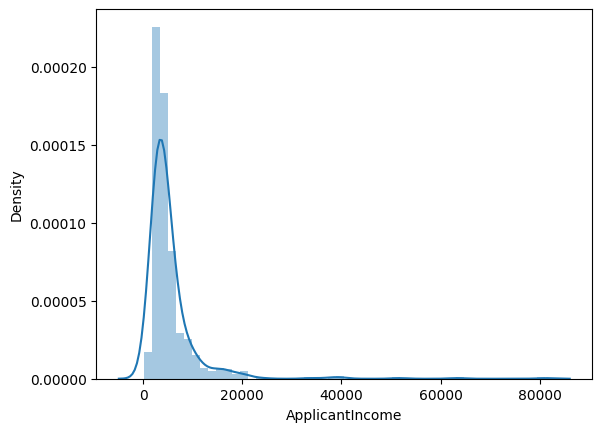

In [33]:
# finding Outlier
sns.distplot(data['ApplicantIncome'])
plt.show()

In [12]:
# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['ApplicantIncome']])
data['ApplicantIncome_ss']=pd.DataFrame(scaler.transform(data[['ApplicantIncome']]),columns=['x'])

In [35]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ss,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,-0.554487,NaN,360.0,1.0,Urban,Y,-0.554487,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,-0.038732,128.0,360.0,1.0,Rural,N,-0.038732,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-0.554487,66.0,360.0,1.0,Urban,Y,-0.554487,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,0.251980,120.0,360.0,1.0,Urban,Y,0.251980,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,-0.554487,141.0,360.0,1.0,Urban,Y,-0.554487,0.097728


In [25]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CoapplicantIncome_ss
count,614.000000,6.140000e+02,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,4.050325e-17,146.412162,342.00000,0.842199,2.893089e-17
std,6109.041673,1.000815e+00,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,-5.544873e-01,9.000000,12.00000,0.000000,-5.544873e-01
25%,2877.500000,-5.544873e-01,100.000000,360.00000,1.000000,-5.544873e-01
50%,3812.500000,-1.480047e-01,128.000000,360.00000,1.000000,-1.480047e-01
75%,5795.000000,2.312023e-01,168.000000,360.00000,1.000000,2.312023e-01
max,81000.000000,1.369617e+01,700.000000,480.00000,1.000000,1.369617e+01


<ipython-input-36-dad8f7070b2c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome_ss'])
<ipython-input-36-dad8f7070b2c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


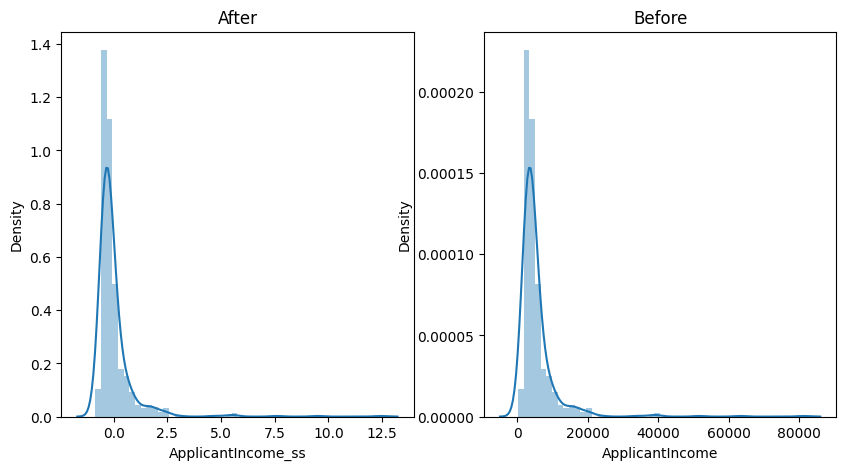

In [36]:
#graph comparision
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('After')
sns.distplot(data['ApplicantIncome_ss'])

plt.subplot(1,2,2)
plt.title('Before')
sns.distplot(data['ApplicantIncome'])

plt.show()

## Feature Scaling(Normalization(MIN/MAX))

In [37]:
from sklearn.preprocessing import MinMaxScaler
Scaler_minmax = MinMaxScaler()
data['ApplicantIncome_MINMAX'] = Scaler_minmax.fit_transform(data[['ApplicantIncome']])

In [38]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ss,ApplicantIncome_ss,ApplicantIncome_MINMAX
0,LP001002,Male,No,0,Graduate,No,5849,-0.554487,NaN,360.0,1.0,Urban,Y,-0.554487,0.072991,0.070489
1,LP001003,Male,Yes,1,Graduate,No,4583,-0.038732,128.0,360.0,1.0,Rural,N,-0.038732,-0.134412,0.054830
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-0.554487,66.0,360.0,1.0,Urban,Y,-0.554487,-0.393747,0.035250
3,LP001006,Male,Yes,0,Not Graduate,No,2583,0.251980,120.0,360.0,1.0,Urban,Y,0.251980,-0.462062,0.030093
4,LP001008,Male,No,0,Graduate,No,6000,-0.554487,141.0,360.0,1.0,Urban,Y,-0.554487,0.097728,0.072356


<ipython-input-42-0c53bfdbf5b8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome_MINMAX'])
<ipython-input-42-0c53bfdbf5b8>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


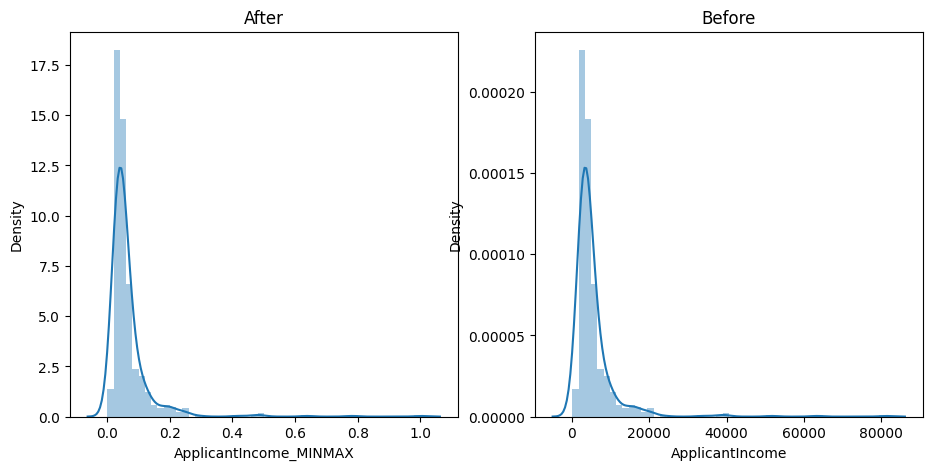

In [42]:
#graph comparision
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title('After')
sns.distplot(data['ApplicantIncome_MINMAX'])

plt.subplot(1,2,2)
plt.title('Before')
sns.distplot(data['ApplicantIncome'])

plt.show()

# Function Transform

In [44]:
# remove outlier

q1=data['ApplicantIncome'].quantile(0.25)
q3=data['ApplicantIncome'].quantile(0.75)
iqr=q3-q1

In [46]:
min_iqr = q1-1.5*iqr
max_iqr = q3+1.5*iqr
min_iqr,max_iqr

(-1498.75, 10171.25)

In [49]:
data= data[data['ApplicantIncome']<=max_iqr]

<ipython-input-51-ca2f39cc37f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


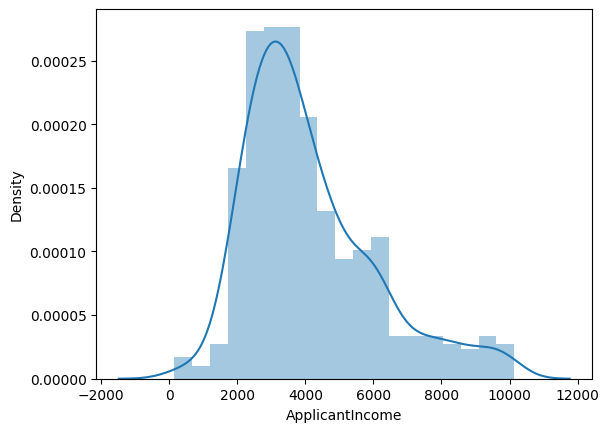

In [51]:
sns.distplot(data['ApplicantIncome'])
plt.show()

In [54]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
tf = FunctionTransformer(func=np.log1p)
data['ApplicantIncome_tf']=tf.fit_transform(data[['ApplicantIncome']])

<ipython-input-54-66dca280a6b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ApplicantIncome_tf']=tf.fit_transform(data[['ApplicantIncome']])


In [55]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ss,ApplicantIncome_ss,ApplicantIncome_MINMAX,ApplicantIncome_tf
0,LP001002,Male,No,0,Graduate,No,5849,-0.554487,NaN,360.0,1.0,Urban,Y,-0.554487,0.072991,0.070489,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,-0.038732,128.0,360.0,1.0,Rural,N,-0.038732,-0.134412,0.054830,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-0.554487,66.0,360.0,1.0,Urban,Y,-0.554487,-0.393747,0.035250,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,0.251980,120.0,360.0,1.0,Urban,Y,0.251980,-0.462062,0.030093,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,-0.554487,141.0,360.0,1.0,Urban,Y,-0.554487,0.097728,0.072356,8.699681


<ipython-input-60-3007ad7c849c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])
<ipython-input-60-3007ad7c849c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome_tf'])


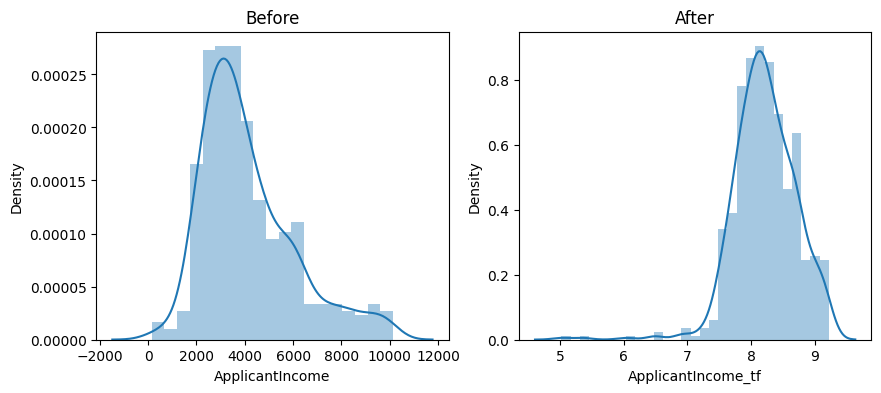

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'])
plt.title('Before')
plt.subplot(1,2,2)
sns.distplot(data['ApplicantIncome_tf'])
plt.title('After')
plt.show()

